In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
df = pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [3]:
df.shape

(1338, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1338 non-null   int64  
 1   sex             1338 non-null   int64  
 2   bmi             1338 non-null   float64
 3   children        1338 non-null   int64  
 4   smoker          1338 non-null   int64  
 5   region          1338 non-null   int64  
 6   charges         1338 non-null   float64
 7   insuranceclaim  1338 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 83.8 KB


In [5]:
df.isnull().sum()

age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

In [6]:
df.describe()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265,0.585202
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237,0.492871
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000,1.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515,1.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010,1.000000


In [7]:
import warnings
warnings.filterwarnings("ignore")

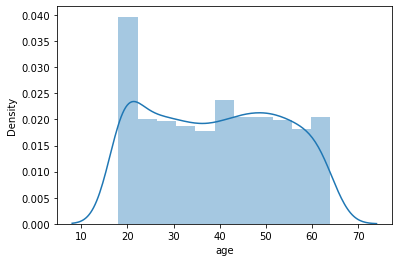

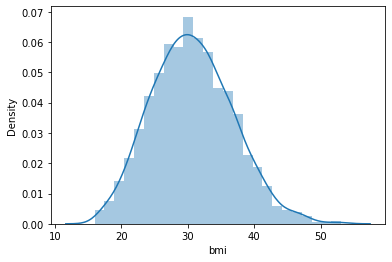

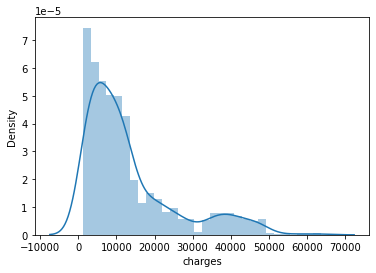

In [8]:
numerical_columns = ["age","bmi","charges"]

for col in numerical_columns:
    plt.figure()
    sns.distplot(df[col])
    plt.show()

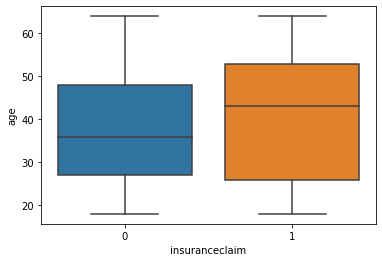

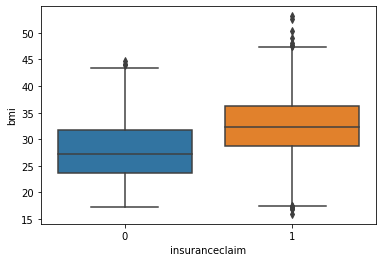

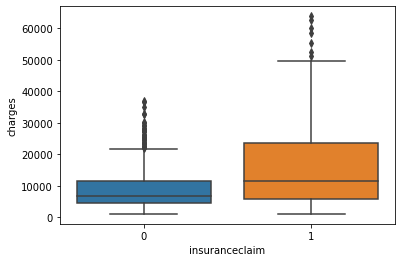

In [9]:
numerical_columns = ["age","bmi","charges"]

for col in numerical_columns:
    plt.figure()
    sns.boxplot(data=df, y=col, x="insuranceclaim")
    plt.show()

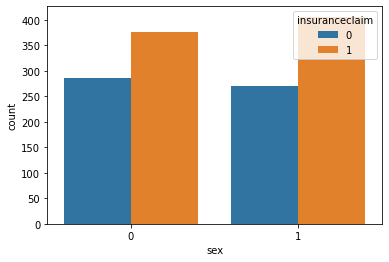

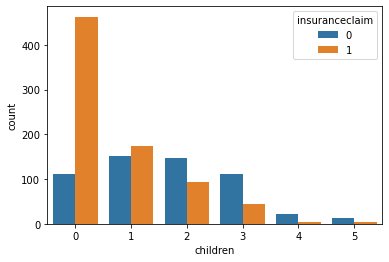

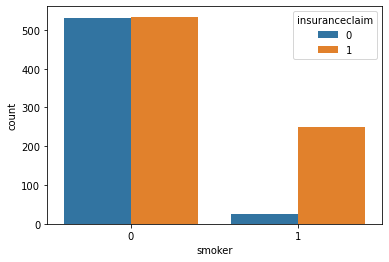

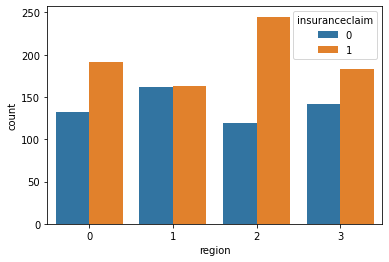

In [10]:
# categorical data
cat_columns = ["sex","children","smoker","region"]

for col in cat_columns:
    plt.figure()
    sns.countplot(data=df, x=col, hue="insuranceclaim")
    plt.show()

In [11]:
# feature and target
# train test split

X = df.drop("insuranceclaim", axis=1)
y = df["insuranceclaim"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=1)

In [12]:
# model

model = LogisticRegression(random_state=1)
model.fit(X_train,y_train)

LogisticRegression(random_state=1)

In [13]:
# train score

model.score(X_train, y_train)

0.8023504273504274

In [14]:
# prediction on test

y_pred = model.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.71      0.74       157
           1       0.82      0.87      0.84       245

    accuracy                           0.81       402
   macro avg       0.80      0.79      0.79       402
weighted avg       0.80      0.81      0.80       402



In [15]:
# confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()

In [16]:
print(tp, fp)
print(fn, tn)


212 45
33 112


In [17]:
#age,sex,bmi,children,smoker,region,charges

output = model.predict(np.array([20,1,33,1,0,3,1725.55230]).reshape(1, -1))

In [18]:
if output[0] == 1:
    print("claim")
else:
    print("no claim")

claim


In [19]:
import pickle

In [20]:
file = open("model.pkl", "wb")
pickle.dump(model, file)
file.close()

In [21]:
from sklearn.decomposition import PCA

In [22]:
pca = PCA(n_components=3,random_state=1)

X_train_pc = pca.fit_transform(X_train)
X_test_pc = pca.transform(X_test)

In [23]:
model_pc = LogisticRegression(random_state=1)
model_pc.fit(X_train_pc,y_train)

LogisticRegression(random_state=1)

In [24]:
y_pred = model_pc.predict(X_test_pc)

In [25]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.62      0.59      0.61       165
           1       0.73      0.75      0.74       237

    accuracy                           0.69       402
   macro avg       0.68      0.67      0.67       402
weighted avg       0.68      0.69      0.69       402

